### ML with SKLearn
Muhammad Zaid

### Installing all relevant packages

We need to install SKLearn, and Pandas. Sklearn for the Machine Learning and Neural Network models, and Pandas for data manipulation.

In [118]:
%pip install -U scikit-learn
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### Read in the data
Read in the Auto.csv file that contains the auto mobile dataset. 

In [119]:
#%%python3
import pandas as pd

# Read in the data
df = pd.read_csv("Auto.csv")
df.head()
print("Dimensions/Shape of the data: ", df.shape)


Dimensions/Shape of the data:  (392, 9)


#### Data Exploration

Now we explore the dataset to see what we are working with. We can see that there are 9 columns, and 392 rows. We can also see that there are some Na's in the dataset in the dataset.

We will explore the dataset further by looking at the mpg, weight, and year columns of the dataset. We can see that the mpg column is a continuous variable, and the year and weight columns are discrete variables.


By looking at the output of the code below we can make more of the data provided in the dataset. We can see that the mpg column has a mean of 23.5, and ranges from 9 to 46. We can also see that the weight column has a mean of 2977, and ranges from 1613 to 5140. We can also see that the year column has a mean of 75.98, and ranges from 70 to 82.

In [120]:
df[['mpg', 'weight', 'year']].describe(include="all")

,mpg,weight,year
count,392.000000,392.000000,390.000000
mean,23.445918,2977.584184,76.010256
std,7.805007,849.402560,3.668093
min,9.000000,1613.000000,70.000000
25%,17.000000,2225.250000,73.000000
50%,22.750000,2803.500000,76.000000
75%,29.000000,3614.750000,79.000000
max,46.600000,5140.000000,82.000000


#### Exploring the data further

Now we check the datatypes of all the the columns, and then change appropriate columns to categorical data. 


In [121]:
# Initial data type without changes
print("Original data types:\n", df.dtypes)
print("----------------------------------")

# Convert the data type of the cylinders column to categorical
df['cylinders'] = df['cylinders'].astype('category')

# Convert the data type of the origin column to categorical
df['origin'] = df['origin'].astype('category')

#Show the updated data types of the columns
print(df.dtypes)

Original data types:
 mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object
----------------------------------
mpg              float64
cylinders       category
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


#### Data Cleaning

Now we clean the data by removing the Na's from the dataset. We can see that there are 6 Na's in the dataset. We can either remove the rows with Na's, or replace the Na's with the mean of the column. We will remove the Na's.

We will also create a new column called mpg_high and delete the mpg and name columns. The mpg_high column will categorical and will be 1 if the mpg is greater than 23.5, and 0 if the mpg is less than or equal to 23.5.

In [122]:
# Drop all NA rows and show the shape of the data
df.isnull().sum()
df.dropna(inplace=True)
print("Dimensions/Shape of the data: ", df.shape)

# Create a new column called 'mpg_level' based on the 'mpg' column
df['mpg_level'] = pd.cut(df['mpg'], bins=[0, 23.5, 46.6], labels=[0, 1])

# Remove mpg column
df.drop('mpg', axis=1, inplace=True)

# Remove name column
df.drop('name', axis=1, inplace=True)

# Show the first 5 rows of the new column
df.head()

Dimensions/Shape of the data:  (389, 9)


,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_level
0,8,307.0,130,3504,12.0,70.0,1,0
1,8,350.0,165,3693,11.5,70.0,1,0
2,8,318.0,150,3436,11.0,70.0,1,0
3,8,304.0,150,3433,12.0,70.0,1,0
6,8,454.0,220,4354,9.0,70.0,1,0


#### Data Visualization

Now we try to look at the data in a different way. We will use a catplot from the seaborn module to look at distribution of which rows had mpgs higher than the average and which had it lower than the average. 

We will also try to plot a relationship plot between the horsepower of a automobile and the weight of the automobile. We can see that there is a positive relationship between the horsepower and the weight of the automobile.

Another plot we will look at is the boxplot of the mpg_high column and the weight.


By looking at each plot I came to some realizations regarding the automobile dataset. First, I realized that with increasing horsepower weight also increases and mpg level goes is most of the time zero. Second, weight is a good predictor for mpg_level as it has a good distribution of the data with clear distinction for each mpg level. Third, the catplot shows that the number of cars with mpg higher than the average is equal to the number of cars with mpg lower than the average, which is a good thing for any model trained to predict the mpg level.

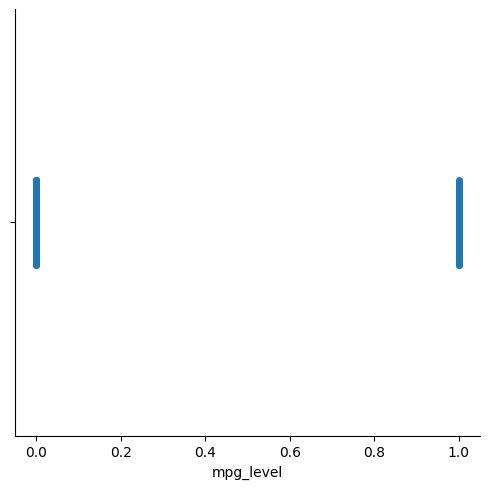

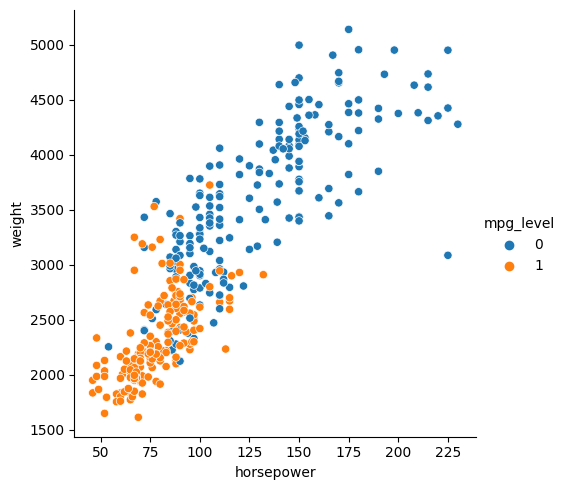

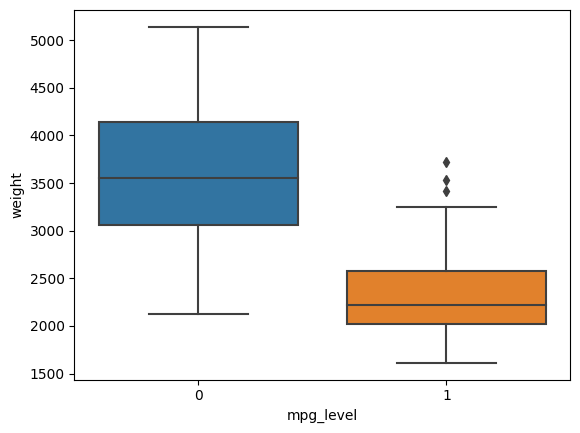

In [123]:
import seaborn as sb
import matplotlib.pyplot as plt

# Create a countplot of the 'mpg_level' column
sb.catplot(x='mpg_level', data=df)
plt.show()

# Create the relplot of the 'weight' and 'horsepower' columns
sb.relplot(x='horsepower', y='weight', data=df, hue='mpg_level')
plt.show()

# Create a boxplot of the 'mpg_level' and weight' columns
sb.boxplot(x='mpg_level', y='weight', data=df)
plt.show()


#### Data Preparation

Now we seperate the dataframe into train and test dataframes. We will use the train dataframe to train our models, and the test dataframe to test our models. We will use 80% of the data for training, and 20% for testing.
The train and test dataframes were selected randomly using the seed 1234.

In [124]:
from sklearn.model_selection import train_test_split

df_without_mpg = df.drop('mpg_level', axis=1)  # drop the 'mpg' column
X = df_without_mpg.loc[:, :]
Y = df.mpg_level

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train.head()


X_train shape:  (311, 7)
X_test shape:  (78, 7)


,cylinders,displacement,horsepower,weight,acceleration,year,origin
184,4,101.0,83,2202,15.3,76.0,2
355,6,145.0,76,3160,19.6,81.0,2
57,4,97.5,80,2126,17.0,72.0,1
170,4,90.0,71,2223,16.5,75.0,2
210,8,350.0,180,4380,12.1,76.0,1


#### Data Modeling -- Logistic Regression

Now that we have looked at all the data, we will try to predict the mpg_high column using all available predictor columns. We will use the Logistic Regression model to do this. We will also use the train dataframe to train the model, and the test dataframe to test the model.

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(random_state=1234, solver='lbfgs', max_iter=500)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

pred = clf.predict(X_test)

print(classification_report(Y_test, pred))



              precision    recall  f1-score   support

           0       0.98      0.80      0.88        51
           1       0.72      0.96      0.83        27

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



#### Observations -- Logistic Regression
Due to problem with convergence when using the lbfgs solver, I increased the max_iter parameter to 500. This increased the accuracy of the model from 0.84 to 0.85, and also got rid of the convergence warning. The precision and recall of the model are also very good. The precision of the model is 0.722 from 0.702, and the recall remained the same. Now I will plot the confusion matrix for this model.

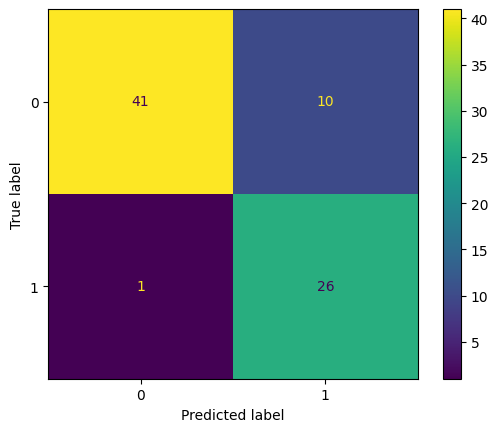

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

disp.plot()

#### Data Modeling -- Decision Tree

Now that we have gotten the results from the logistic regression model, we will try to better our results using the Decision Tree model.

In [127]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1234)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

pred = clf.predict(X_test)

print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        51
           1       0.83      0.93      0.88        27

    accuracy                           0.91        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.92      0.91      0.91        78



#### Observations -- Decision Tree

As can be seen in the classification report for the decision tree model, the accuracy of the model is around 0.91, which better than the accuracy for the logistic regression model. The precision and recall of the model are also very good. They seemed to have increased from the logistic regression model, depending on the class. It seems like the class with a really good precision or recall in the logistic regression model took a hit in the descision tree model, and the class with a really bad precision or recall in the logistic regression model became better in the descision tree model. Now I will plot descision tree for this model.

[Text(0.6433823529411765, 0.9444444444444444, 'x[0] <= 5.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4338235294117647, 0.8333333333333334, 'x[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.27941176470588236, 0.7222222222222222, 'x[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.14705882352941177, 0.6111111111111112, 'x[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.058823529411764705, 0.5, 'x[4] <= 13.75\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.029411764705882353, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08823529411764706, 0.3888888888888889, 'x[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.058823529411764705, 0.2777777777777778, 'x[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.029411764705882353, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08823529411764706, 0.16666666666666666, 'x

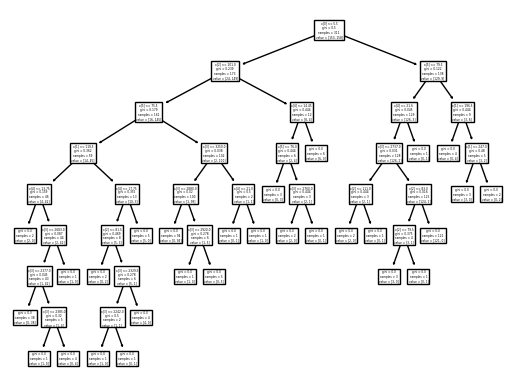

In [128]:
from sklearn.tree import plot_tree

plot_tree(clf)

#### Data Modeling -- Neural Network

Now that we have used traditional machine learning algorithms, we will try to use a neural network to predict the mpg_high column. We will use the MLPClassifier from the sklearn.neural_network module to do this. First we  normalize the data, and then we will use the train dataframe to train the model, and the test dataframe to test the model.

We will try to train and evaluate the neural network twice, with different topologies. And then try it with the best solver.

So the first model is right below:

In [129]:
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7, 4, 3), max_iter=1000, random_state=1234)
clf.fit(X_train_scaled, Y_train)

pred = clf.predict(X_test_scaled)

print(classification_report(Y_test, pred))


              precision    recall  f1-score   support

           0       0.96      0.90      0.93        51
           1       0.83      0.93      0.88        27

    accuracy                           0.91        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.92      0.91      0.91        78



Lets try this again with a different topology, but the same solver.

In [130]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(8, 6), max_iter=1000, random_state=1234)
clf.fit(X_train_scaled, Y_train)

pred = clf.predict(X_test_scaled)

print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        51
           1       0.81      0.93      0.86        27

    accuracy                           0.90        78
   macro avg       0.88      0.90      0.89        78
weighted avg       0.91      0.90      0.90        78



And now lets try this with different solver for both topologies. Namely just the sgd solver.

In [131]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(8, 6), max_iter=1000, random_state=1234)
clf.fit(X_train_scaled, Y_train)

pred = clf.predict(X_test_scaled)

print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        51
           1       0.74      0.93      0.82        27

    accuracy                           0.86        78
   macro avg       0.84      0.87      0.85        78
weighted avg       0.88      0.86      0.86        78



Now for the second topology.

In [132]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(7, 4, 3), max_iter=1000, random_state=1234)
clf.fit(X_train_scaled, Y_train)

pred = clf.predict(X_test_scaled)

print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        51
           1       0.73      1.00      0.84        27

    accuracy                           0.87        78
   macro avg       0.86      0.90      0.87        78
weighted avg       0.91      0.87      0.87        78



#### Observations -- Neural Network

The results shown above seem to suggest that more layers, for a neural network with the same number of neurons performs better than a neural network with less layers. This can be seen in the accuracy of the models using three layers instead of two, which resulted in a increase of 0.01 in the accuracy in geeral. The best performing solver for this dataset was the lgbs solver, which resulted in more exagerated increases in accuracy. This could be atttributed to the smaller size of the dataset used in this project. The best performing model was in the end the one that combined the three layered design with the lgbs solver.

#### Conclusion

Over all when looking at the models that were trained in this notebook, it seemed that the traditional ml algorithms seemed to perform on par or worse than the neural network. In the end the nerual network and decision tree left the logistic regresion model in the dust with their accuracy around 0.91 compared to the logistic regression accuracy around 0.86. Between the NN and the tree Decicion, we saw that they both seemed to give the same results from the presicion to recall, all percentages were equal for each class. Maybe in the making of neural network with its three layers, I replicated the decision tree that trained earlier. With the logisitic regression model, the precision was extremely high for class 0, where it was around 0.98, while class 1 suffered with a precision of 0.72. The opposite was true for the recall. Except for the class 0 precision of 0.98, it did not best the other models in anything else.

This project was supposed to introduce us to machine learning in python. The experience I gained while working with python, left a positive impression in the end. In comparison to R, I think python does a lot of things better, interms of keeping consistent APIs and documentation for the modules available for our use. Otherwise in substance both seemed equally easy to use, and both had their own quirks. However, R does lose a couple of points because of the interface I am stuck with when using R. Its a old shoddy early 2000s GUI that just makes life hard in comparison to using a jupyter notebook. I think I will stick to python for the time being, and maybe use R when I need to do some statistics.

